# Predict Customer Churn using Logistic Regression 

## For this project we will be analyzing Telecom Churn data from [Kaggle](https://www.kaggle.com/dileep070/logisticregression-telecomcustomer-churmprediction?select=churn_data.csv). 
## The data contains the following fields:

#### * CustomerID :The unique ID of each customer
#### * Gender :The gender of a person
#### * SeniorCitizen :Whether a customer can be classified as a senior citizen.
#### * Partner :If a customer is married/ in a live-in relationship.
#### * Dependents :If a customer has dependents (children/ retired parents)
#### * Tenure :The time for which a customer has been using the service.
#### * PhoneService :Whether a customer has a landline phone service along with the internet service.
#### * MultipleLines :Whether a customer has multiple lines of internet connectivity.
#### * InternetService :The type of internet services chosen by the customer.
#### * OnlineSecurity :Specifies if a customer has online security.
#### * OnlineBackup :Specifies if a customer has online backup.
#### * DeviceProtection :Specifies if a customer has opted for device protection.
#### * TechSupport :Whether a customer has opted for tech support of not.
#### * StreamingTV :Whether a customer has an option of TV streaming.
#### * StreamingMovies :Whether a customer has an option of Movie streaming.
#### * Contract :The type of contract a customer has chosen.
#### * PaperlessBilling :Whether a customer has opted for paperless billing.
#### * PaymentMethod :Specifies the method by which bills are paid.
#### * MonthlyCharges :Specifies the money paid by a customer each month.
#### * TotalCharges :The total money paid by the customer to the company.
#### * Churn :This is the target variable which specifies if a customer has churned or not.


#  Data & Setup 

**import pandas,numpy**

In [82]:
import numpy as np 
import pandas as pd

**Load datasets**

In [83]:
churn_data=pd.read_csv('churn_data.csv')

In [84]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
customer_data=pd.read_csv('customer_data.csv')

In [86]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [87]:
internet_data=pd.read_csv('internet_data.csv')

In [88]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


### **Combine all datasets into a single Dataset** 

In [89]:
df_1=pd.merge(churn_data,customer_data,how='inner',on='customerID')

In [90]:
telecom=pd.merge(df_1,internet_data,how='inner',on='customerID')

In [91]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [92]:
pd.set_option('display.max_columns',None)

In [93]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


### **Inspect the dataframe**

In [94]:
telecom.shape

(7042, 21)

In [95]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,0.162170
std,24.557955,30.088238,0.368633
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


**Maximum MonthlyCharges : 118.75 , Mean MonthlyCharges : 64.75**

# **Data Preparation**

In [96]:
#checking for any missing values
telecom.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [97]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


### Totalcharges should be of type float 

In [98]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')

In [99]:
telecom.isna().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

#### Changing TotalCharges into Float , some missing values are there .

In [100]:
#remove missing Values 
telecom.dropna(inplace=True)

In [101]:
telecom.to_csv('Telecom_Cust_Churn.csv')

**Drop customerID column**

In [102]:
telecom.shape

(7031, 21)

In [103]:
#remove the customerID column 
telecom.drop(columns='customerID',inplace=True)

In [104]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


#### **Convert Churn (yes/no) to 0/1**

In [105]:
telecom['Churn']=telecom['Churn'].replace({'Yes':1,'No':0})

In [106]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [107]:
# columns with Yes/No discrete Categorical Value 
varlist=['PhoneService','PaperlessBilling','Partner','Dependents']

def uvalue(x):
    for i in x:
        print('{} : {}'.format(i,telecom[i].unique()))
        
uvalue(varlist)

PhoneService : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']


## **Convert them as well into 0/1**

In [108]:
varlist=['PhoneService','PaperlessBilling','Partner','Dependents']

# define a func to map these columns
def mapthem(x):
    return x.map({'Yes':1,'No':0})

# apply the function to the datadrame
telecom[varlist]=telecom[varlist].apply(mapthem)

In [109]:
telecom[varlist]

,PhoneService,PaperlessBilling,Partner,Dependents
0,0,1,1,0
1,1,0,0,0
2,1,1,0,0
3,0,0,0,0
4,1,1,0,0
...,...,...,...,...
7037,1,1,0,0
7038,1,1,1,1
7039,1,1,1,1
7040,0,1,1,1


In [110]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


##  **Other columns , having Dicrete Value along with Yes/No**

In [111]:
telecom.columns.values

array(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'], dtype=object)

In [112]:
varlist_1=['MultipleLines','InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies']

In [113]:
telecom[varlist_1]

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No phone service,DSL,No,Yes,No,No,No,No
1,No,DSL,Yes,No,Yes,No,No,No
2,No,DSL,Yes,Yes,No,No,No,No
3,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
7037,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,No phone service,DSL,Yes,No,No,No,No,No


In [114]:
uvalue(varlist_1)

MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']


### We can convert these dicrete Values into seperate columns with their discrete value ,  in pandas we can get this done  with pd.get_dummies()

In [115]:
# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'InternetService'
Is=pd.get_dummies(telecom['InternetService'],prefix='InternetService')
# Dropping InternetService_No service column
Is1=Is.drop(['InternetService_No'],1)
# Adding the results to the Master Dataframe
telecom= pd.concat([telecom,Is1],axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [116]:
telecom.shape

(7031, 36)

### Drop columns which have dummies values created .

In [117]:
telecom.drop(columns=varlist_1,axis=1,inplace=True)

In [118]:
telecom.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [119]:
pd.set_option('display.max_columns',None)

In [120]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


# EDA 

### Import Visualization libraries

In [121]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0, 0.5, '# of Customers')

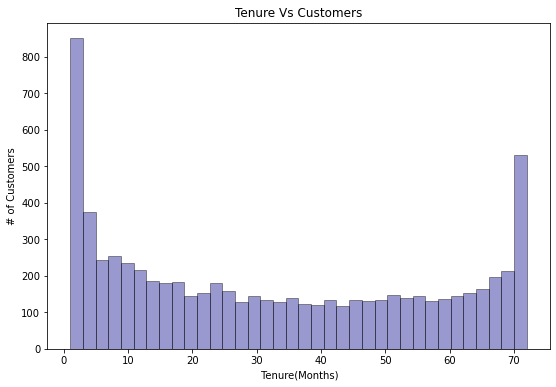

In [122]:
plt.figure(figsize=(9,6))
sns.distplot(telecom['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Tenure Vs Customers')
plt.xlabel(' Tenure(Months)')
plt.ylabel('# of Customers')

#### After looking at the Above figure we can see that a lot of customers have been with company for only few months & quite many others have 72 months .

Text(0, 0.5, ' # of Customers ')

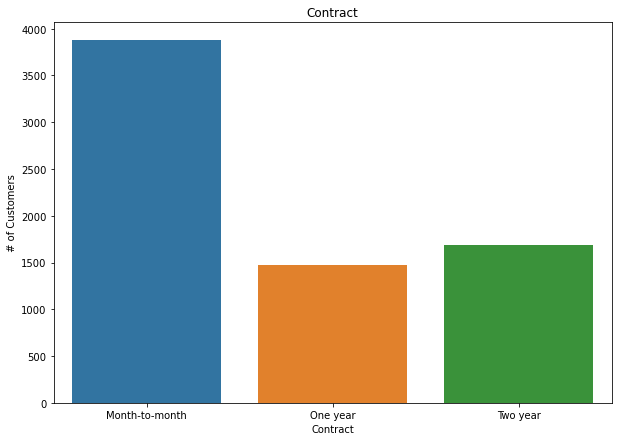

In [123]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='Contract',data=telecom)
ax.set_title('Contract')
ax.set_xlabel('Contract')
ax.set_ylabel(' # of Customers ')

### As we can see from this graph most of the customers are in the month to month contract.

Text(0, 0.5, '# of Customers')

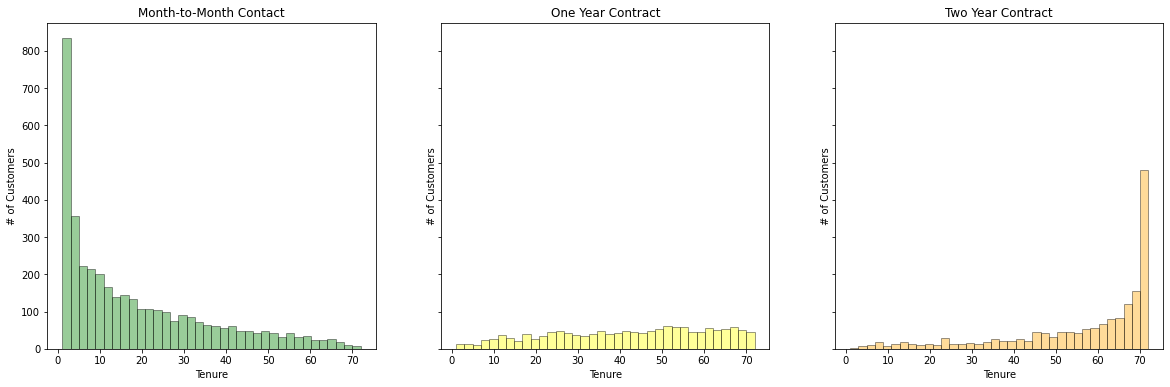

In [124]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax=sns.distplot(telecom[telecom['Contract']=='Month-to-month']['tenure'],hist=True,kde=False,
               bins=int(180/5),color='green',
               hist_kws={'edgecolor':'black'},
               kde_kws={'linewidth': 4},
               ax=ax1)
ax.set_title('Month-to-Month Contact')
ax.set_xlabel('Tenure')
ax.set_ylabel('# of Customers')

ax=sns.distplot(telecom[telecom['Contract']=='One year']['tenure'],hist=True,kde=False,
               bins=int(180/5),color='yellow',
               hist_kws={'edgecolor':'black'},
               kde_kws={'linewidth':4},
               ax=ax2)
ax.set_title('One Year Contract')
ax.set_xlabel('Tenure')
ax.set_ylabel('# of Customers')

ax=sns.distplot(telecom[telecom['Contract']=='Two year']['tenure'],hist=True,kde=False,
               bins=int(180/5),color='orange',
               hist_kws={'edgecolor':'black'},
               kde_kws={'linewidth':4},
               ax=ax3)
ax.set_title('Two Year Contract')
ax.set_xlabel('Tenure')
ax.set_ylabel('# of Customers')

### Most of the month-to-month contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. 
### Customers with long term contract , are loyal to company .

In [125]:
v1=round(len(telecom.loc[telecom['Churn']==0])*100/len(telecom),2)
print(' % of Customers still with the comany {}%'.format(v1))

 % of Customers still with the comany 73.42%


Text(0, 0.5, '# of customers')

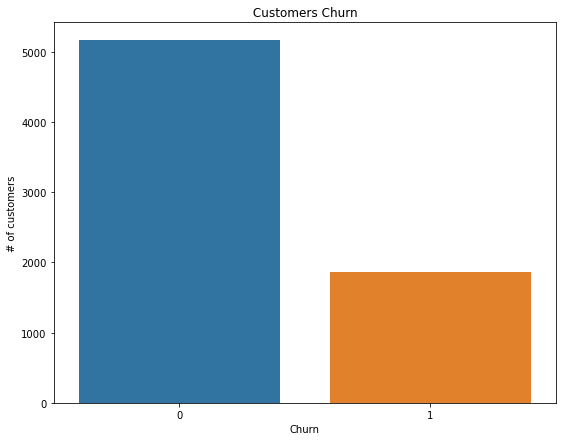

In [126]:
plt.figure(figsize=(9,7))
sns.countplot(x='Churn',data=telecom)
plt.title(' Customers Churn ')
plt.ylabel('# of customers')

Text(0, 0.5, ' # of Customers ')

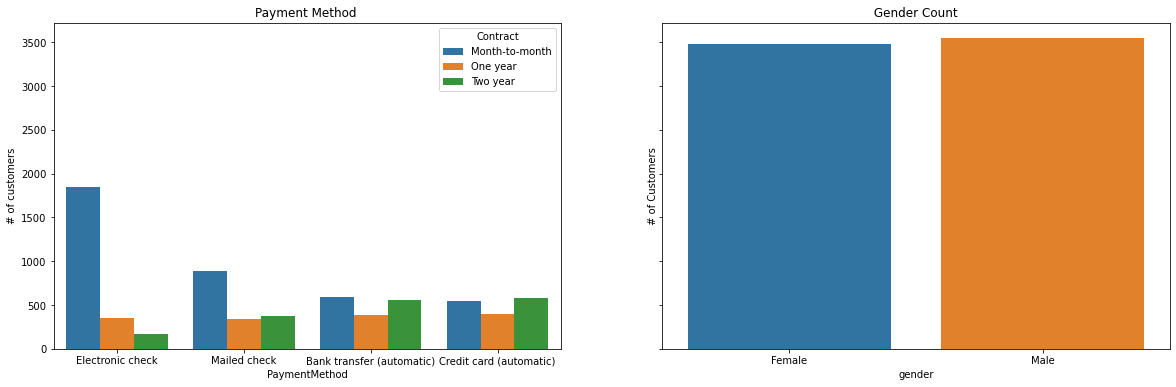

In [127]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(20,6))

ax=sns.countplot(x='PaymentMethod',hue='Contract',data=telecom,ax=ax1,orient='v')
ax.set_title('Payment Method ')
ax.set_ylabel('# of customers')

ax=sns.countplot(x='gender',data=telecom,ax=ax2,orient='h')
ax.set_title(' Gender Count ')
ax.set_ylabel(' # of Customers ')

### Electronic Check is widely used as mode of payment for Month-to-Month contracts & least for Two year contracts .

Text(0, 0.5, ' # of Customers ')

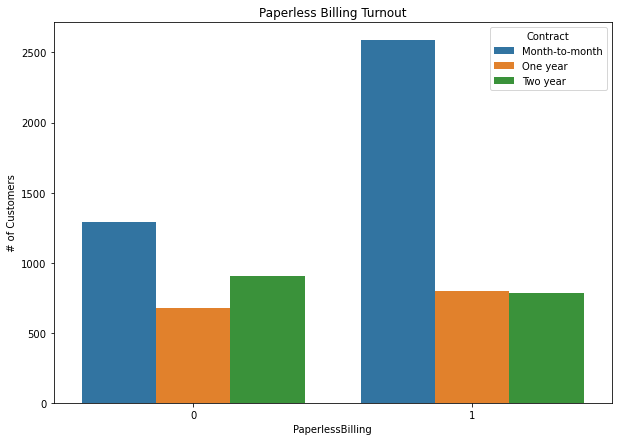

In [128]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='PaperlessBilling',data=telecom,hue='Contract')
ax.set_title('Paperless Billing Turnout')
ax.set_ylabel(' # of Customers ')

### Customers having month-to-month contract , prefer paperless billing highly . 

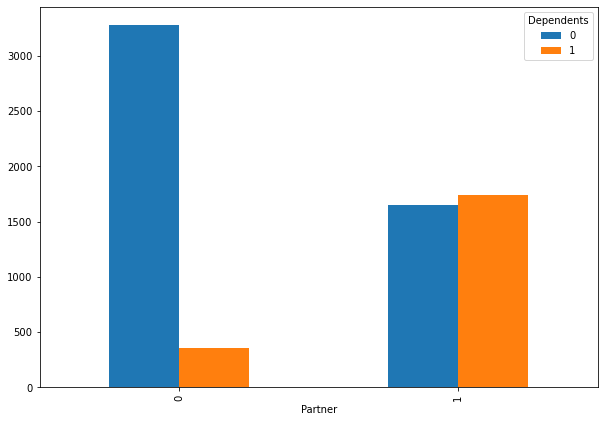

In [129]:
fig,ax=plt.subplots(figsize=(10,7))
telecom.groupby(['Partner','Dependents']).count()['PhoneService'].unstack().plot(kind='bar',ax=ax)

### Customers(single) do not opt for Landline Phone Service . 

Text(0.5, 1.0, 'Charges Relationship')

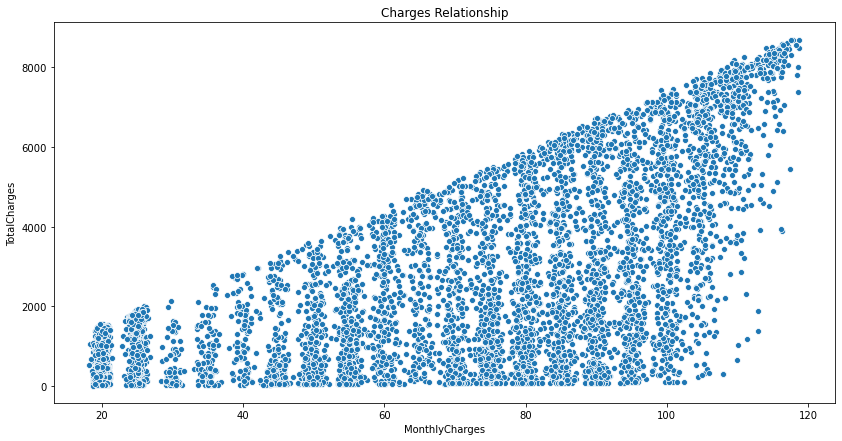

In [130]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=telecom)
plt.title('Charges Relationship')

### As monthly Charges Increases , TotalCharges increases linearly .

Text(0.5, 1.0, 'Charges Relationship')

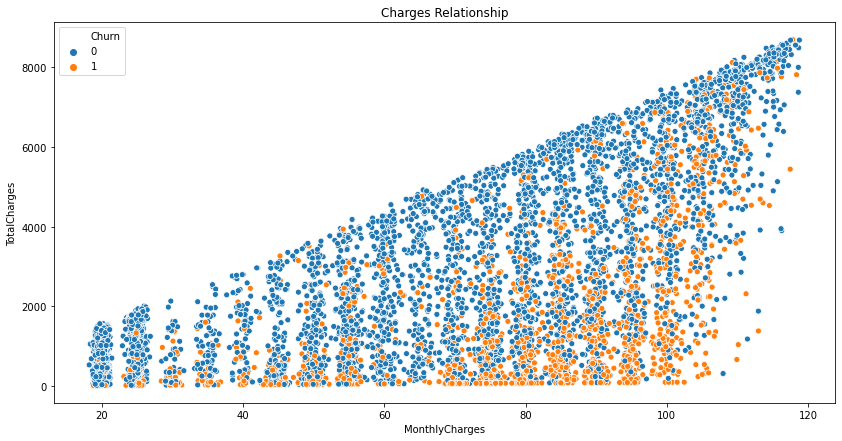

In [131]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=telecom,hue='Churn',)
plt.title('Charges Relationship')

### Customers , stay with company have MonthlyCharges mostly B/W 40 & 100 

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

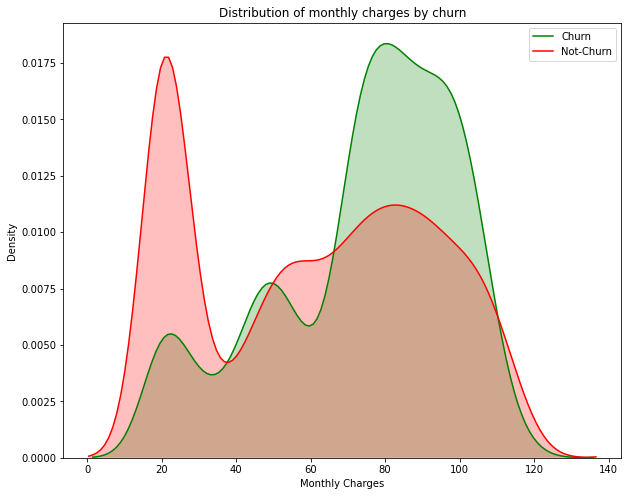

In [132]:
plt.figure(figsize=(10,8))
ax=sns.kdeplot(telecom[telecom['Churn']==1]['MonthlyCharges'],color='green',shade=True)
ax=sns.kdeplot(telecom[telecom['Churn']==0]['MonthlyCharges'],color='red',shade=True,ax=ax)
ax.legend(["Churn","Not-Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### Distribution of monthly charges , is not uniform . 

Text(0.5, 1.0, 'Distribution of TotalCharges by churn')

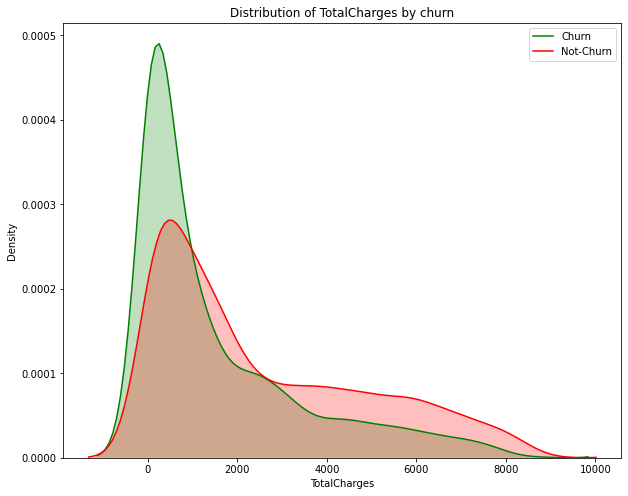

In [133]:
plt.figure(figsize=(10,8))
ax=sns.kdeplot(telecom[telecom['Churn']==1]['TotalCharges'],color='green',shade=True)
ax=sns.kdeplot(telecom[telecom['Churn']==0]['TotalCharges'],color='red',shade=True,ax=ax)
ax.legend(["Churn","Not-Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of TotalCharges by churn')

### Now let's look at the distribution of various services used by customers

In [134]:
telecom.columns.values

array(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'], dtype=object)

In [135]:
services=[ 'MultipleLines_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes',
        'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes',
        'StreamingMovies_Yes','InternetService_DSL','InternetService_Fiber optic']

In [136]:
len(services)

9

In [137]:
for item in services:
    cond=telecom[item]==1
    cond1=telecom[item]==0
    perct_item=round(len(telecom.loc[cond][item])*100/len(telecom),2)
    perct_item_1=round(len(telecom.loc[cond1][item])*100/len(telecom),2)
    print('% of Customer Using {} is {}% , % of Customer Not Using is {}%'.format(item,perct_item,perct_item_1),end='\n')

% of Customer Using MultipleLines_Yes is 42.2% , % of Customer Not Using is 57.8%
% of Customer Using OnlineSecurity_Yes is 28.64% , % of Customer Not Using is 71.36%
% of Customer Using OnlineBackup_Yes is 34.49% , % of Customer Not Using is 65.51%
% of Customer Using DeviceProtection_Yes is 34.38% , % of Customer Not Using is 65.62%
% of Customer Using TechSupport_Yes is 29.0% , % of Customer Not Using is 71.0%
% of Customer Using StreamingTV_Yes is 38.43% , % of Customer Not Using is 61.57%
% of Customer Using StreamingMovies_Yes is 38.83% , % of Customer Not Using is 61.17%
% of Customer Using InternetService_DSL is 34.36% , % of Customer Not Using is 65.64%
% of Customer Using InternetService_Fiber optic is 44.02% , % of Customer Not Using is 55.98%


### Most used Service is MultipleLines , least used service is OnlineSecurity & Fiber Optic Setup is Opted most by Customers .

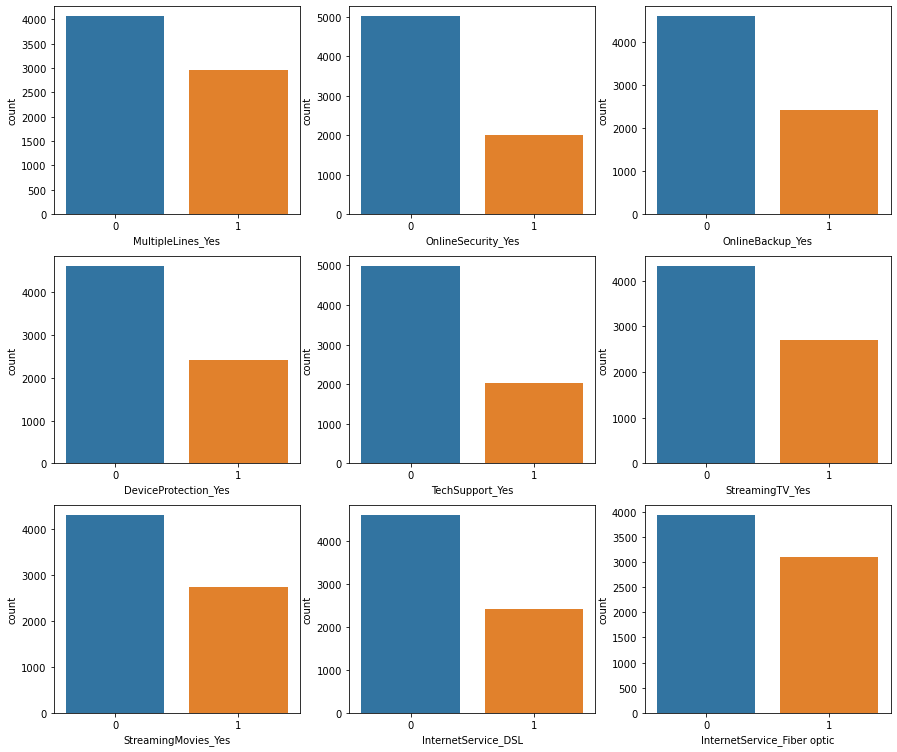

In [138]:
fig, axes=plt.subplots(nrows=3,ncols=3,figsize=(15,13))

for i,item in enumerate(services):
    if i < 3:
        ax = sns.countplot(x=telecom[item],ax=axes[0,i])
    elif i>=3 and i<6:
        ax = sns.countplot(x=telecom[item],ax=axes[1,i-3])
    elif i<9:
        ax = sns.countplot(x=telecom[item],ax=axes[2,i-6])

### Few Steps , before we start with Building a Model

In [139]:
#Convert these categorial variables into 1/0 , for ease of building Model .
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

#Drop the variables, for whose dummies just created.
telecom.drop(['Contract', 'PaymentMethod', 'gender'],axis=1,inplace=True)

#Let's  check the dataframe .
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,1,0,1,29.85,29.85,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1
2,2,1,1,53.85,108.15,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1
3,45,0,0,42.30,1840.75,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1
4,2,1,1,70.70,151.65,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0


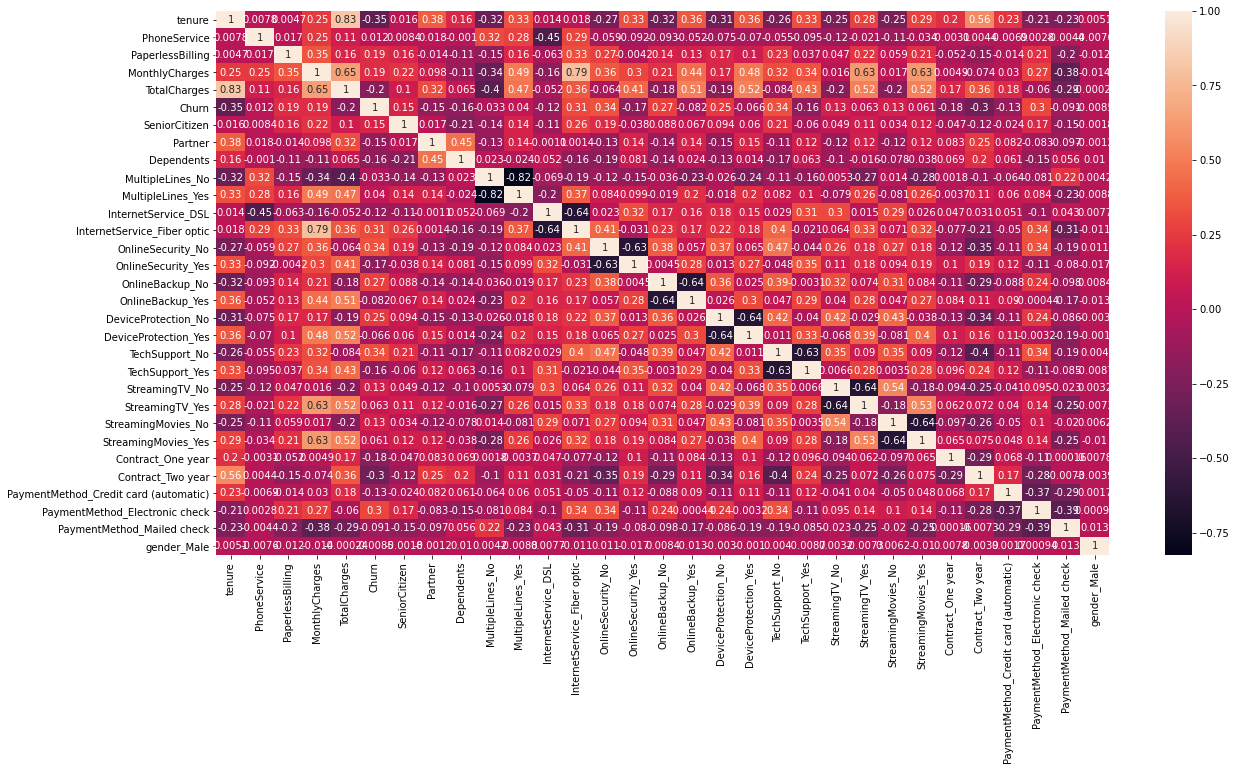

In [140]:
#lets check the Correlation of the variables 
plt.figure(figsize = (20,10))
sns.heatmap(telecom.corr(),annot = True)
plt.show()

### Dropping highly correlated dummy variables , as they are redundant data with Opposite value 

In [141]:
services_no=['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No','InternetService_DSL']

In [142]:
telecom.drop(services_no,axis=1,inplace=True)

### Lets again look at correlation Heatmap

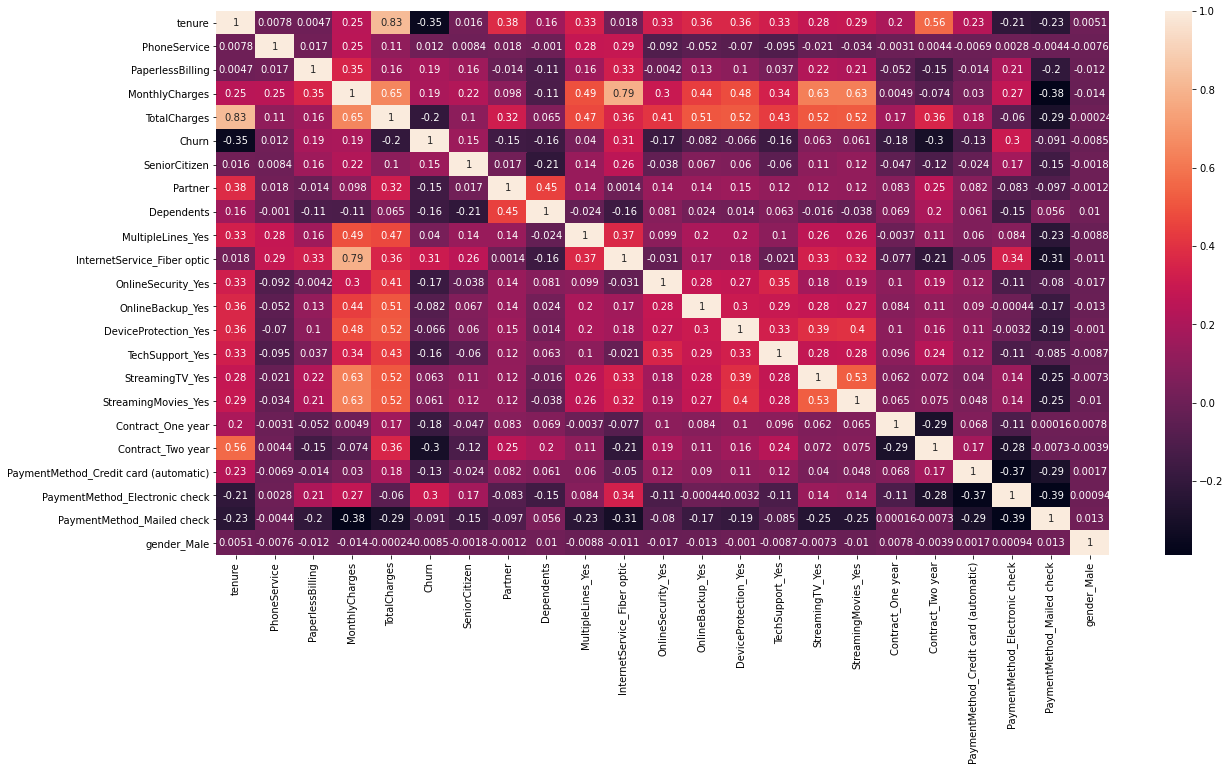

In [143]:
plt.figure(figsize = (20,10))        
sns.heatmap(telecom.corr(),annot = True)
plt.show()

## Split the data , Using train_test_split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
# Divide data , into Independent Variable(X) & Dependent variable / Taget Variable (Y) 

X=telecom.drop('Churn',axis=1)
Y=telecom['Churn']

In [146]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1
2,2,1,1,53.85,108.15,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,45,0,0,42.30,1840.75,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1
4,2,1,1,70.70,151.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [147]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [148]:
# define training data & testing data 

X_train, X_test , y_train, y_test = train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

In [149]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
879,33,1,1,54.65,1665.20,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
5789,25,1,0,19.80,475.20,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
5008,6,1,0,19.65,116.85,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
880,10,1,1,110.10,1043.30,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1
2784,4,1,1,98.10,396.30,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0


In [150]:
y_train

879     0
5789    0
5008    0
880     1
2784    1
       ..
79      0
3934    0
5964    0
6947    0
5649    0
Name: Churn, Length: 4921, dtype: int64

In [151]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.582278481012654

#### We have almost 27% Churn rate . 

In [152]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [153]:
#Predict values on the train set, using the models.
prediction_test=model.predict(X_test)
#Check the Prediction value
prediction_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### **Let's Check the metrics,see how the model panned out**

In [154]:
from sklearn import metrics

In [155]:
# Accuracy Score
print(metrics.accuracy_score(y_test,prediction_test))

0.7995260663507109


In [156]:
#Confusion Metrics
print(metrics.confusion_matrix(y_test,prediction_test))

[[1390  150]
 [ 273  297]]


In [167]:
#Let's check Coefficients of Model
model.coef_[0]

array([-6.32111559e-02, -7.84316847e-01,  4.26800182e-01,  1.61125052e-02,
        2.72345134e-04,  5.26063285e-01,  9.22158720e-02, -2.30879963e-01,
        2.34027266e-01,  4.79390653e-01, -4.98336103e-01, -2.41557534e-01,
       -6.14150185e-02, -5.35264465e-01,  1.62172210e-02,  2.79284522e-02,
       -4.61812550e-01, -6.39243161e-01, -1.73747767e-01,  1.39194372e-01,
       -2.76375129e-01,  2.66538895e-02])

AxesSubplot(0.125,0.125;0.775x0.755)


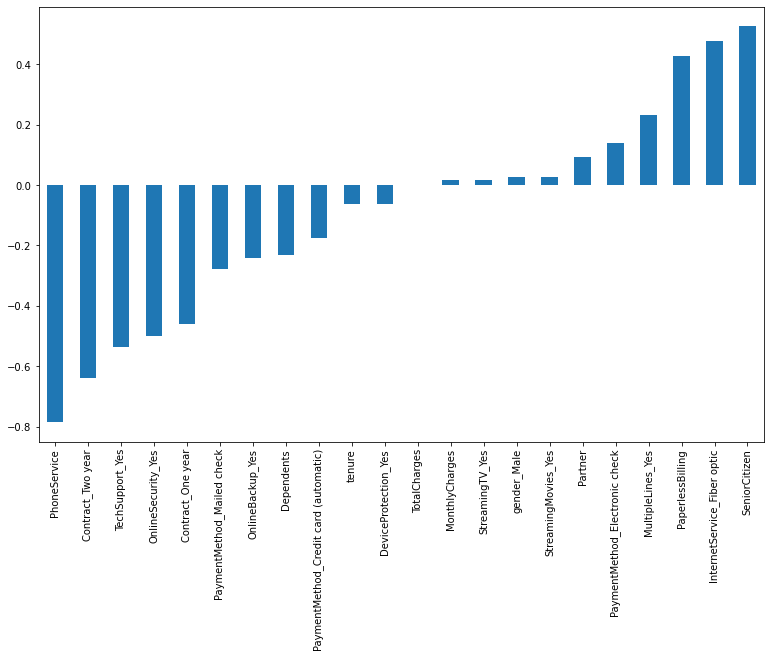

In [169]:
#Wieghts of Variable on the predicter .
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = True).plot(kind='bar',figsize=(13,8)))

## Observations

* We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation.
    Negative relation means that likeliness of churn decreases with that variable

### Let us summarize some of the interesting features below:

#### Factor's which have a Negative relation on Target(Churn) Variable 
* People having 2 Year Contract along With PhoneService 
* People opting for Tech Support & OnlineSecurity
* Mailed Check as mode of payment 
* Online Backup incase phone is lost, broken or not working 

#### Factors having Positive relation on Target(Churn) Variable 
* Fiber Optics been used as Setup of Network 
* PaperLess Biling ,so user is not always looking for bills, easy to pay & you get frequent reminder for it 
* People having Multiple Lines , which ususally cost a lot more 
* Streaming Movies on Web consume lot of Data & bandwidth allocated to your plan finishes up easy 